In [5]:
!pip install yfinance

In [6]:
import yfinance as yf

# Define the stock symbol and the date range
stock_symbol = "AAPL"  # Apple Inc.
start_date = "2020-01-01"
end_date = "2023-01-01"

# Download the data
data = yf.download(stock_symbol, start=start_date, end=end_date)

# Save the data to a CSV file
data.to_csv(f"{stock_symbol}_stock_data.csv")

# Display the first few rows of the dataset
print(data.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.716087  72.776613  71.466827  71.721034  135480400
2020-01-03  72.009125  72.771752  71.783969  71.941336  146322800
2020-01-06  72.582893  72.621631  70.876060  71.127851  118387200
2020-01-07  72.241562  72.849239  72.021246  72.592609  108872000
2020-01-08  73.403648  73.706279  71.943759  71.943759  132079200


[*********************100%***********************]  1 of 1 completed


Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.716087  72.776613  71.466827  71.721034  135480400
2020-01-03  72.009125  72.771752  71.783969  71.941336  146322800
2020-01-06  72.582893  72.621631  70.876060  71.127851  118387200
2020-01-07  72.241562  72.849239  72.021246  72.592609  108872000
2020-01-08  73.403648  73.706279  71.943759  71.943759  132079200


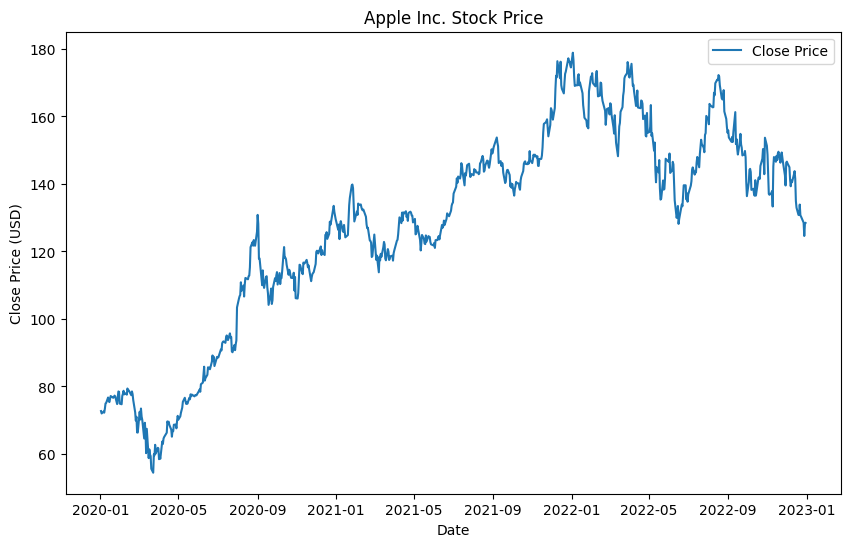

In [8]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the stock symbol and the date range
stock_symbol = "AAPL"  # Apple Inc.
start_date = "2020-01-01"
end_date = "2023-01-01"

# Download the data
data = yf.download(stock_symbol, start=start_date, end=end_date)

# Save the data to a CSV file
data.to_csv(f"{stock_symbol}_stock_data.csv")

# Display the first few rows of the dataset
print(data.head())

# *** Changed code starts here ***
# Rename the 'Date' column (if it's not present)
# In yfinance, the index is already a DatetimeIndex, so we don't need to create a 'Date' column
# Instead, we reset the index to make 'Date' a regular column
df = data.reset_index()

# Select the 'Date' and 'Close' columns
df = df[['Date', 'Close']]

# Convert 'Date' to datetime format (if it's not already)
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)
# *** Changed code ends here ***

# Plot the closing price
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.title('Apple Inc. Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

In [9]:
# Create a new feature 'Days' which represents the number of days since the first date
df['Days'] = (df.index - df.index[0]).days

# Prepare the data for training
X = df[['Days']]
y = df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

Mean Squared Error: 287.1671412920661
R^2 Score: 0.7141385310731665


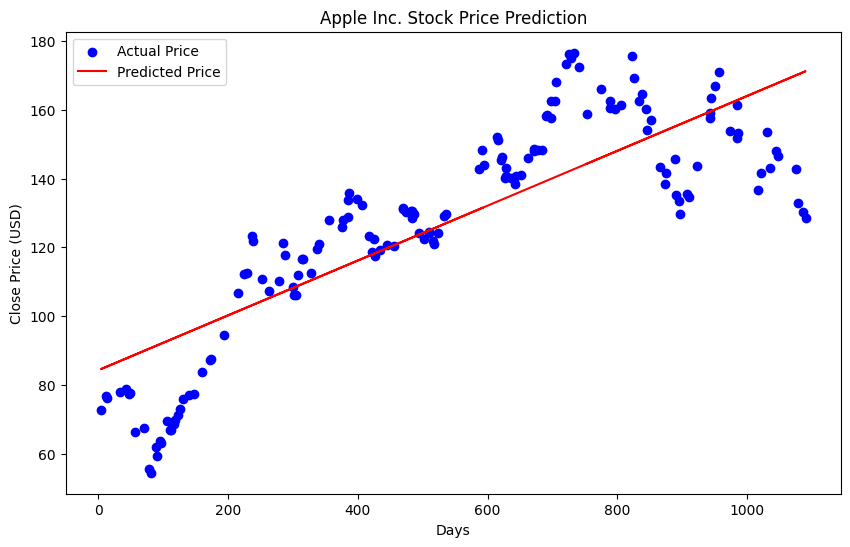

In [11]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Price')
plt.plot(X_test, y_pred, color='red', label='Predicted Price')
plt.title('Apple Inc. Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

In [12]:
import joblib

# Save the model to a file
joblib.dump(model, 'stock_price_prediction_model.pkl')

['stock_price_prediction_model.pkl']

In [13]:
import joblib

# Load the saved model
model = joblib.load('stock_price_prediction_model.pkl')

In [17]:
import pandas as pd

# Example: New data (dates for which you want to predict the stock price)
new_dates = pd.date_range(start='2027-10-01', end='2027-10-10', freq='D')

# Convert dates to a DataFrame
new_data = pd.DataFrame({'Date': new_dates})

# Convert 'Date' to datetime format
new_data['Date'] = pd.to_datetime(new_data['Date'])

# Calculate the number of days since the first date in the original dataset
# (Assuming the first date in the original dataset was '1980-12-12')
first_date = pd.to_datetime('1980-12-12')
new_data['Days'] = (new_data['Date'] - first_date).dt.days

# Extract the feature (Days) for prediction
X_new = new_data[['Days']]

In [18]:
# Make predictions
predicted_prices = model.predict(X_new)

# Add the predictions to the new_data DataFrame
new_data['Predicted_Close'] = predicted_prices

# Display the predictions
print(new_data[['Date', 'Predicted_Close']])

        Date  Predicted_Close
0 2027-10-01      1447.713544
1 2027-10-02      1447.793305
2 2027-10-03      1447.873066
3 2027-10-04      1447.952827
4 2027-10-05      1448.032588
5 2027-10-06      1448.112349
6 2027-10-07      1448.192110
7 2027-10-08      1448.271872
8 2027-10-09      1448.351633
9 2027-10-10      1448.431394


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


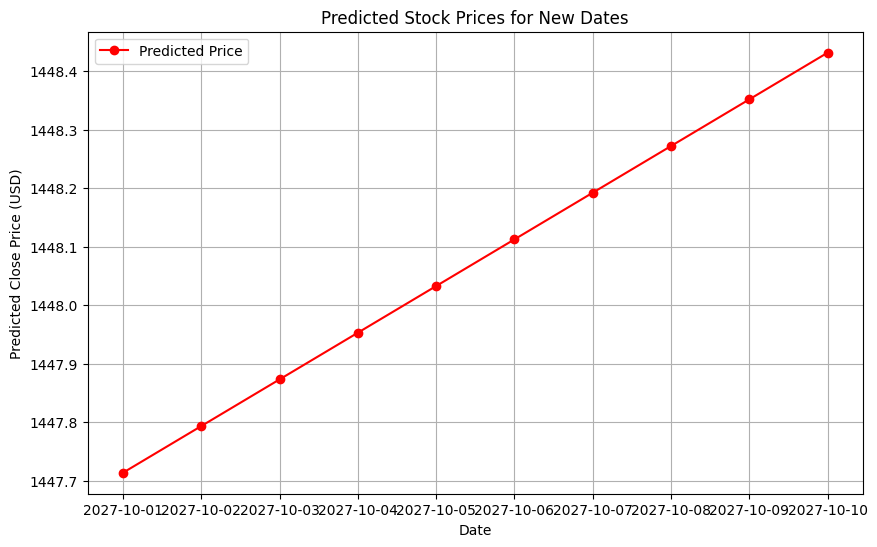

In [19]:
import matplotlib.pyplot as plt

# Plot the predicted prices
plt.figure(figsize=(10, 6))
plt.plot(new_data['Date'], new_data['Predicted_Close'], marker='o', color='red', label='Predicted Price')
plt.title('Predicted Stock Prices for New Dates')
plt.xlabel('Date')
plt.ylabel('Predicted Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()